## HYPOTHESIS
### IDEA
Men are likely to bike in the night time than women 
### Null Hypothesis:
The ratio of man start biking in the night time to man start biking in the day time is the same or lower than the ratio of woman biking in the night time over woman biking in the day time
                H0: m_nighttime/m_daytime > w_nighttime/w_daytime
                Ha: m_nighttime/m_daytime <= w_nighttime/w_daytime
                
with:
    - Day time: from 7am - 7pm
    - Night time: from 7pm - 7 am
    - m_nighttime: number of times the biker is male and bike in the night time
    - m_daytime: number of times the biker is male and bike in the day time
    - w_nighttime: number of times the biker is female and bike in the night time
    - w_daytime: number of times the biker is female and bike in the day time
    
The signficance level for this test is 0.05 

In [12]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
    
if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

if not os.path.isdir(os.getenv('PUIDATA')):
    os.makedirs(os.getenv('PUIDATA'))

Populating the interactive namespace from numpy and matplotlib


In [13]:
print(os.getenv('PUI2016'))

/home/cusp/ttd255/PUI2016


In [14]:
print(os.getenv('PUIDATA'))

/home/cusp/ttd255/PUIdata


In [15]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [16]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [17]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [7]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [18]:
df.drop(['tripduration', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

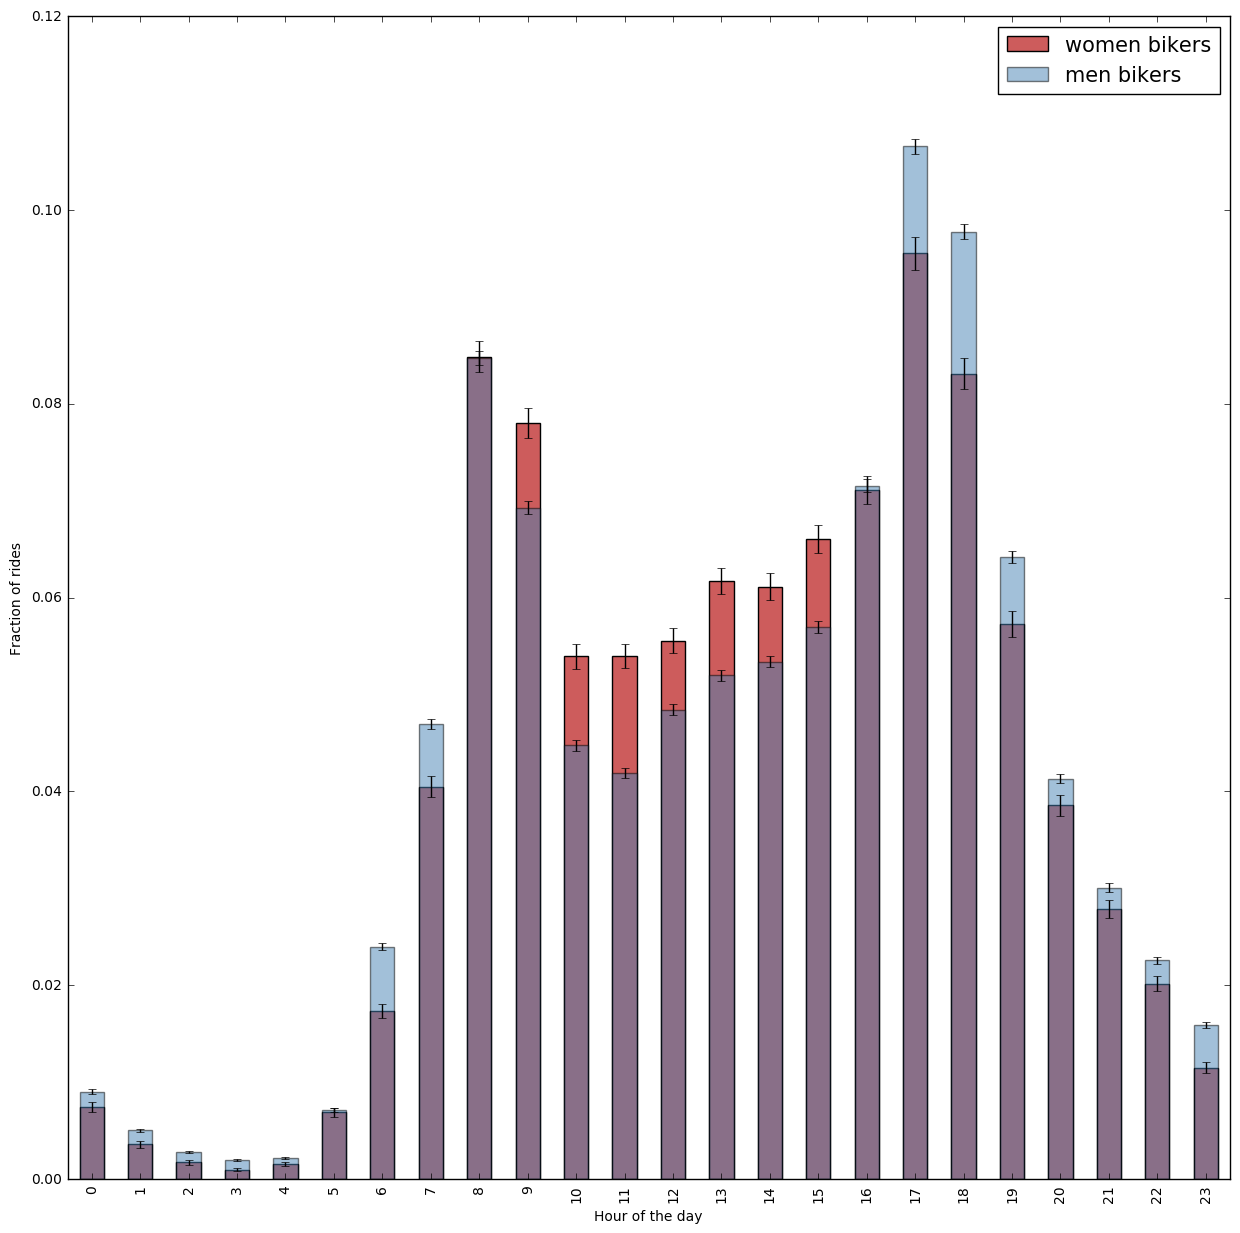

In [19]:
fig1 = pl.figure(figsize(15,15))

counts_w = df['date'][df['gender'] == 2].groupby([df['date'].dt.hour]).count()
counts_m = df['date'][df['gender'] == 1].groupby([df['date'].dt.hour]).count()

norm_w = counts_w.sum()
norm_m = counts_m.sum()

error_w = np.sqrt(counts_w)
error_m = np.sqrt(counts_m)

ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')
ax=((counts_m) / norm_m).plot(kind="bar",color='SteelBlue', alpha = 0.5,  yerr=[
           ((error_m) / norm_m, (error_m) / norm_m)], label='men bikers')

ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Hour of the day")
pl.legend(['women bikers','men bikers'],fontsize=15)